In [33]:
# importing necessary Libraries of python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib import cm

In [22]:
data = pd.read_csv(r'D:/projects/data analatics/assignment/python project/youtube.csv', encoding="latin-1")


# Display the first few rows of the DataFrame
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
data.tail()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
data.shape

(995, 28)

In [6]:
data.size

27860

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [8]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [9]:
top10yters = data.nlargest(10, 'subscribers')[['Youtuber', 'subscribers', 'category']]

print(top10yters)

                     Youtuber  subscribers          category
0                    T-Series    245000000             Music
1              YouTube Movies    170000000  Film & Animation
2                     MrBeast    166000000     Entertainment
3  Cocomelon - Nursery Rhymes    162000000         Education
4                   SET India    159000000             Shows
5                       Music    119000000               NaN
6         ýýý Kids Diana Show    112000000    People & Blogs
7                   PewDiePie    111000000            Gaming
8                 Like Nastya    106000000    People & Blogs
9               Vlad and Niki     98900000     Entertainment


This data provides insights into the top 10 YouTube channels based on subscriber count, along with their corresponding categories. It highlights the most popular channels and their content categories, offering valuable information about trending content and audience preferences on the platform.

In [10]:
oldest = data.loc[data['created_date'].idxmin(), ['Youtuber', 'subscribers', 'Title', 'channel_type', 'created_date', 'created_year']]
newest = data.loc[data['created_date'].idxmax(), ['Youtuber', 'subscribers', 'Title', 'channel_type', 'created_date', 'created_year']]
rows = data.shape[0]
print("Oldest YouTuber:")
print(oldest)

print("\nNewest YouTuber:")
print(newest)

print("\nTotal Row Count:", rows)


Oldest YouTuber:
Youtuber        Cocomelon - Nursery Rhymes
subscribers                      162000000
Title           Cocomelon - Nursery Rhymes
channel_type                     Education
created_date                           1.0
created_year                        2006.0
Name: 3, dtype: object

Newest YouTuber:
Youtuber        ýýýýýýýý ýý ýýýýýýýýýýýýýý
subscribers                       43200000
Title           ýýýýýýýý ýý ýýýýýýýýýýýýýý
channel_type                     Education
created_date                          31.0
created_year                        2011.0
Name: 64, dtype: object

Total Row Count: 995


This data highlights the oldest and newest YouTubers, showcasing their creation dates, subscriber counts, titles, and channel types. 

In [11]:
highest_views = data.loc[data['video views'].idxmax(), ['Youtuber', 'subscribers', 'video views']]
lowest_views = data.loc[data['video views'].idxmin(), ['Youtuber', 'subscribers', 'video views']]
highest_subscribers = data.loc[data['subscribers'].idxmax(), ['Youtuber', 'subscribers', 'video views']]
lowest_subscribers = data.loc[data['subscribers'].idxmin(), ['Youtuber', 'subscribers', 'video views']]

print("YouTuber with the highest views:")
print(highest_views)

print("\nYouTuber with the lowest views:")
print(lowest_views)

print("\nYouTuber with the highest subscribers:")
print(highest_subscribers)

print("\nYouTuber with the lowest subscribers:")
print(lowest_subscribers)


YouTuber with the highest views:
Youtuber             T-Series
subscribers         245000000
video views    228000000000.0
Name: 0, dtype: object

YouTuber with the lowest views:
Youtuber       YouTube Movies
subscribers         170000000
video views               0.0
Name: 1, dtype: object

YouTuber with the highest subscribers:
Youtuber             T-Series
subscribers         245000000
video views    228000000000.0
Name: 0, dtype: object

YouTuber with the lowest subscribers:
Youtuber       Natan por Aï¿
subscribers         12300000
video views     9029609749.0
Name: 990, dtype: object


This data showcases a comparison of YouTube channels based on their viewership and subscriber counts. It highlights the channels with the highest and lowest views, as well as those with the highest and lowest subscriber counts. 

In [12]:
highest_uploads = data.loc[data['uploads'].idxmax(), ['Title', 'Youtuber', 'subscribers', 'video views']]
lowest_uploads = data.loc[data['uploads'].idxmin(), ['Title', 'Youtuber', 'subscribers', 'video views']]
print("YouTuber with the highest uploads:")
print(highest_uploads)
print(lowest_uploads)


YouTuber with the highest uploads:
Title               ABP NEWS
Youtuber            ABP NEWS
subscribers         37000000
video views    13102611515.0
Name: 95, dtype: object
Title              Music
Youtuber           Music
subscribers    119000000
video views          0.0
Name: 5, dtype: object


This analysis examines upload frequency on YouTube, pinpointing channels with the highest and lowest activity levels. It provides insights into audience engagement and content creation strategies.

In [13]:

nan_counts = data.isna().sum()

print("Count of NaN values with column names:")
print(nan_counts)

Count of NaN values with column names:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month        

Count of NaN values for each column in the DataFrame, excluding the last six columns. NaN counts are calculated to identify missing data in the dataset

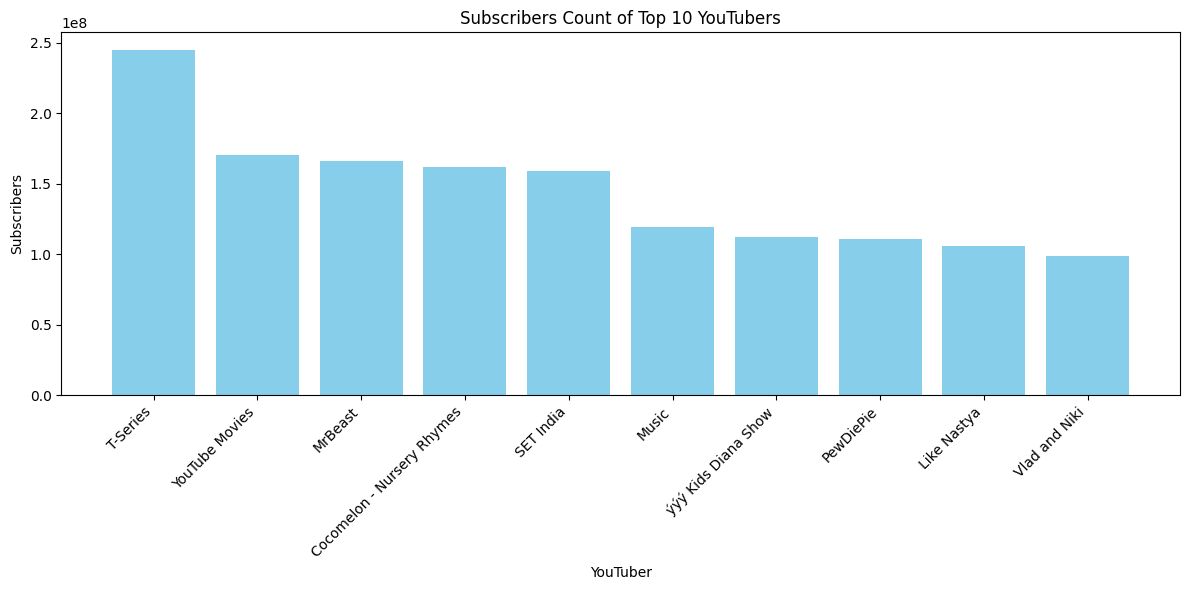

In [14]:
top_10 = data.nlargest(10, 'subscribers')

subs = top_10['subscribers']  
youtubers = top_10['Youtuber']      

plt.figure(figsize=(12, 6))                    
plt.bar(youtubers, subs, color='skyblue')  
plt.xlabel('YouTuber')                         
plt.ylabel('Subscribers')                      
plt.title('Subscribers Count of Top 10 YouTubers') 
plt.xticks(rotation=45, ha='right')          
plt.tight_layout()                            
plt.show()


This bar chart illustrates the distribution of subscribers among the top 10 YouTubers. It provides a visual representation of the proportion of subscribers each YouTuber holds within the top 100, offering insights into their relative popularity and influence on the platform.

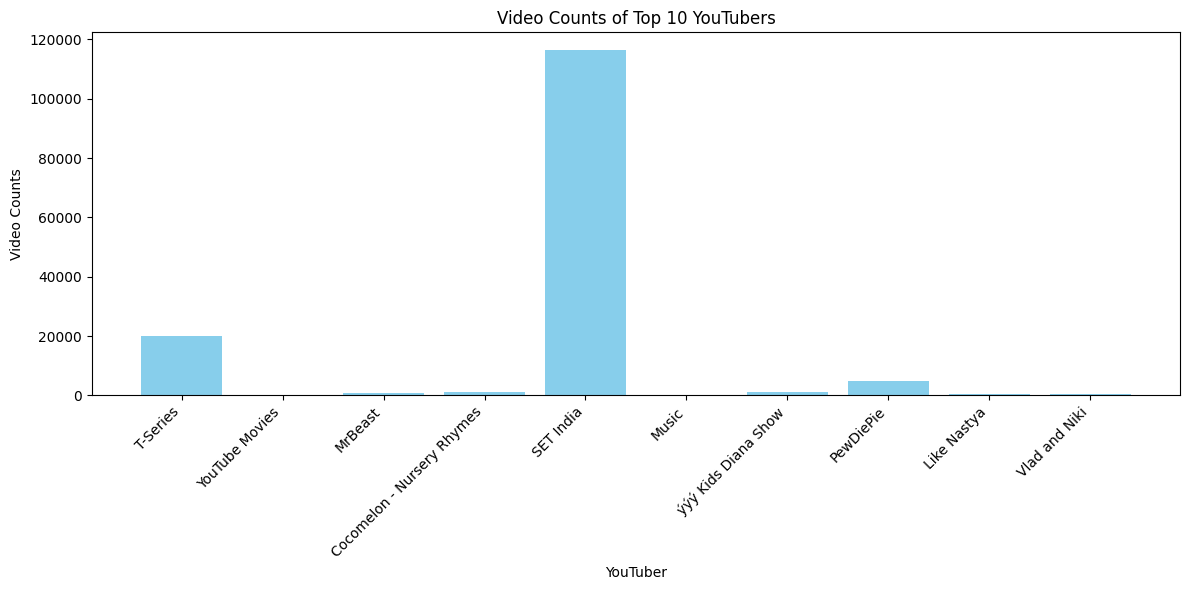

In [15]:
top_10_youtubers = data.nlargest(10, 'subscribers')


uploads = top_10_youtubers['uploads']
youtubers = top_10_youtubers['Youtuber']

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(youtubers, uploads, color='skyblue')
plt.xlabel('YouTuber')
plt.ylabel('Video Counts')
plt.title('Video Counts of Top 10 YouTubers')
plt.xticks(rotation=45, ha='right')  #
plt.tight_layout() 
plt.show()

This bar chart illustrates the distribution of video counts among the top 10 YouTubers. It offers a visual representation of the relative quantity of videos uploaded by each YouTuber within the top 10.

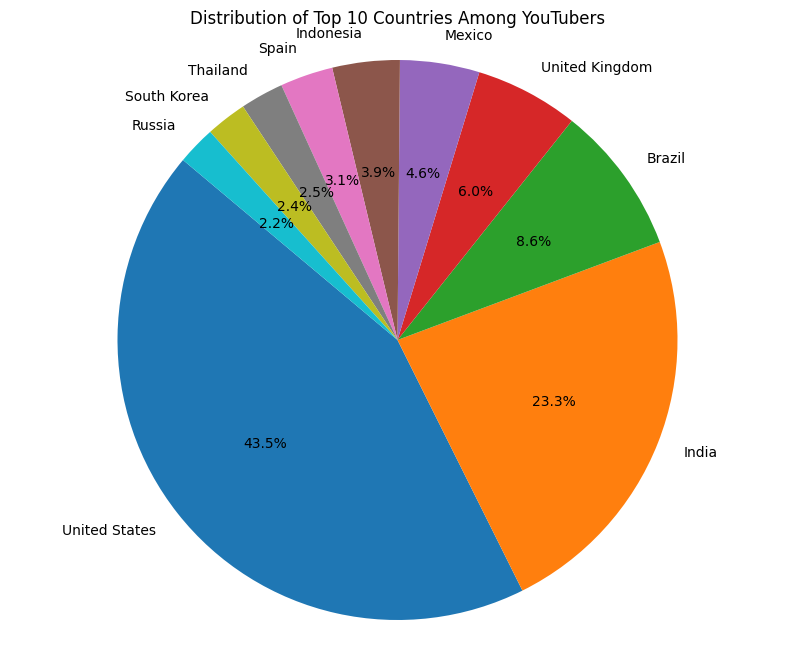

In [16]:
top_10_countries = data['Country'].value_counts().nlargest(10)


plt.figure(figsize=(10, 8))
top_10_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribution of Top 10 Countries Among YouTubers')
plt.axis('equal') 
plt.ylabel('')  
plt.show()


This pie chart represents the top 10 countries amoung the youtubers.

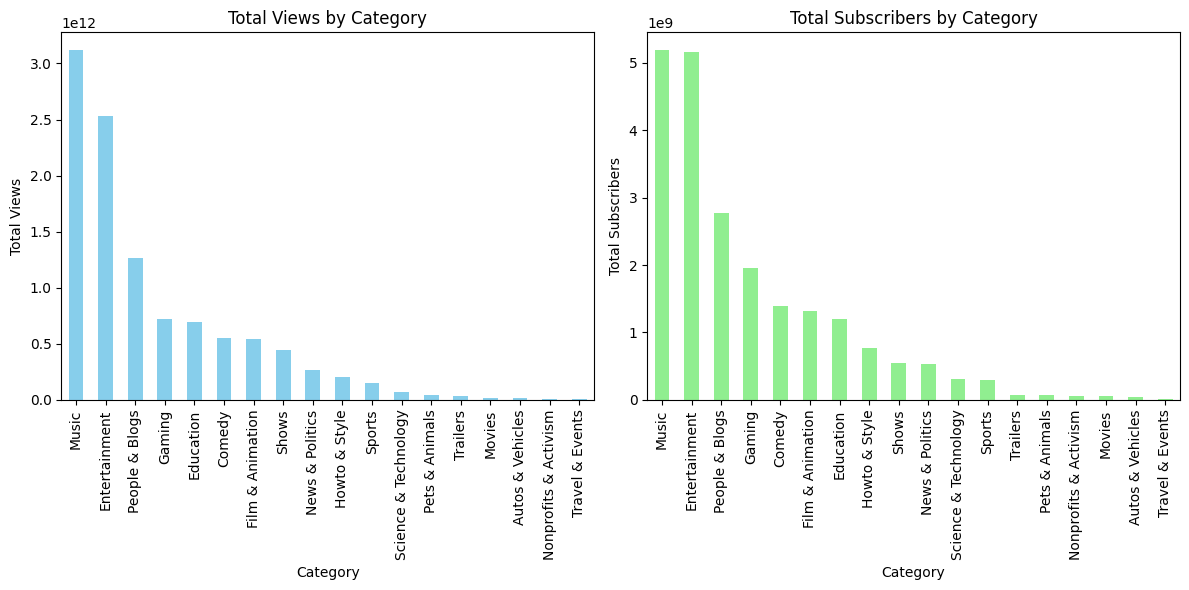

In [17]:
category_views = data.groupby('category')['video views'].sum().sort_values(ascending=False)
category_subscribers = data.groupby('category')['subscribers'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
category_views.plot(kind='bar', color='skyblue')
plt.title('Total Views by Category')
plt.xlabel('Category')
plt.ylabel('Total Views')

plt.subplot(1, 2, 2)
category_subscribers.plot(kind='bar', color='lightgreen')
plt.title('Total Subscribers by Category')
plt.xlabel('Category')
plt.ylabel('Total Subscribers')

plt.tight_layout()  

plt.show()


This chart gives a snapshot of views and subscribers across different content categories. It helps understand which categories are popular among viewers and which ones attract the most subscribers.

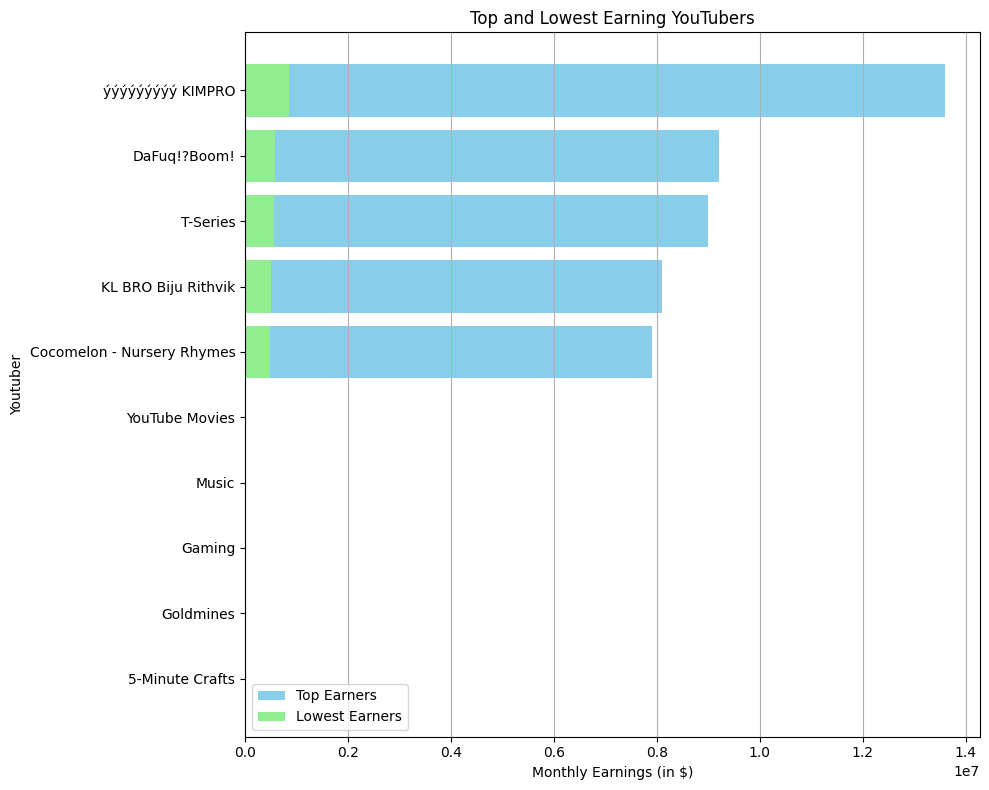

In [18]:
top_earners = data.nlargest(5, 'highest_monthly_earnings')  # Select top 5 earners
lowest_earners = data.nsmallest(5, 'lowest_monthly_earnings')  # Select lowest 5 earners

combined_df = pd.concat([top_earners, lowest_earners], ignore_index=True)


plt.figure(figsize=(10, 8))
plt.barh(combined_df['Youtuber'], combined_df['highest_monthly_earnings'], color='skyblue', label='Top Earners')

# Plotting lowest earners with slight offset
offset = 0.1 * np.arange(len(combined_df))
plt.barh(combined_df['Youtuber'], combined_df['lowest_monthly_earnings'] + offset, color='lightgreen', label='Lowest Earners')

plt.xlabel('Monthly Earnings (in $)')
plt.ylabel('Youtuber')
plt.title('Top and Lowest Earning YouTubers')
plt.gca().invert_yaxis() 
plt.legend() 
plt.grid(axis='x')  
plt.tight_layout()
plt.show()

This horizontal bar chart illustrates the monthly earnings of both the top and lowest earning YouTubers. The top 5 earners are represented by the sky blue bars, while the lowest 5 earners are represented by the light green bars. Each bar indicates the monthly earnings (in $) of the respective YouTuber. The chart provides a visual comparison of the earnings disparity among YouTubers on the platform.

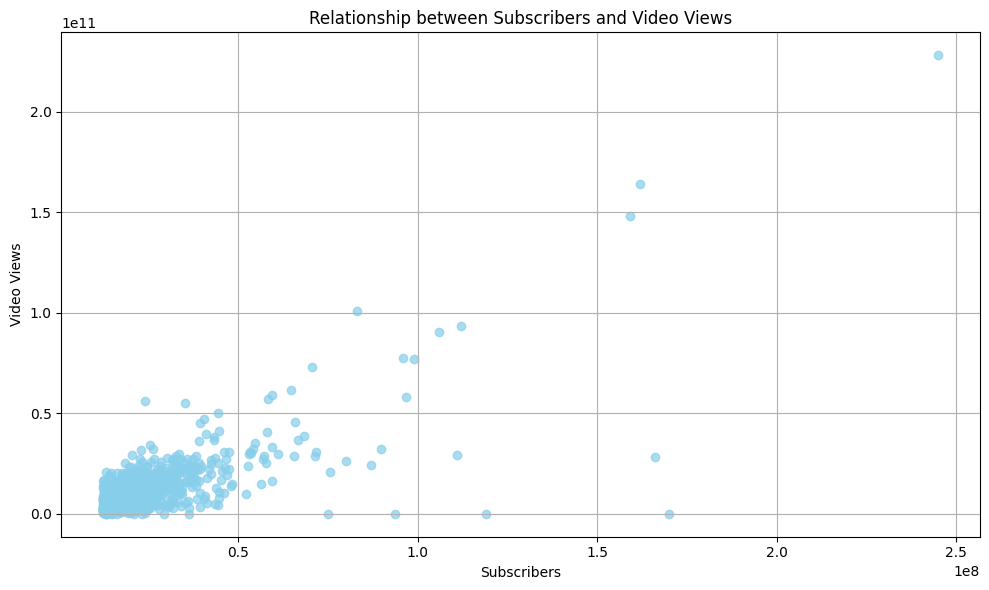

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(data['subscribers'], data['video views'], color='skyblue', alpha=0.7)
plt.title('Relationship between Subscribers and Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.grid(True)

# Show the scatter plot
plt.tight_layout()
plt.show()


This scatter plot visualizes the relationship between the number of subscribers and the total video views for YouTubers in the dataset. Each data point represents a YouTuber, with the x-axis indicating the number of subscribers and the y-axis indicating the total video views. The plot enables the exploration of any correlation or patterns between subscriber count and video views among the YouTubers.

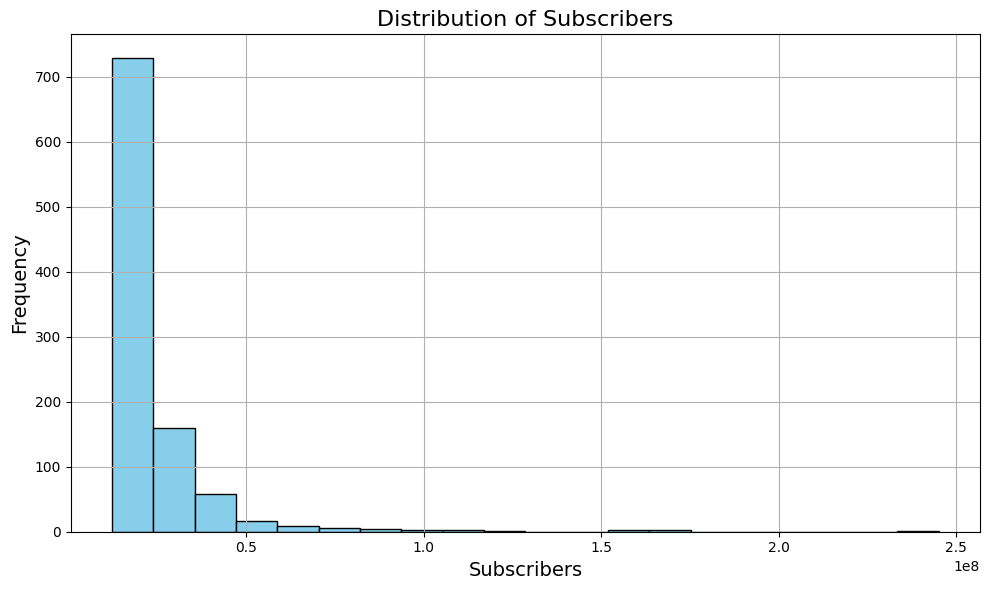

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data['subscribers'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Subscribers', fontsize=16)
plt.xlabel('Subscribers', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

# Show the histogram
plt.tight_layout()
plt.show()


This histogram displays the distribution of subscribers among YouTubers in the dataset. The x-axis represents the number of subscribers, while the y-axis indicates the frequency of YouTubers falling within each subscriber range. The histogram provides insights into the spread and concentration of subscriber counts across the dataset, allowing for an understanding of the audience sizes of YouTubers.

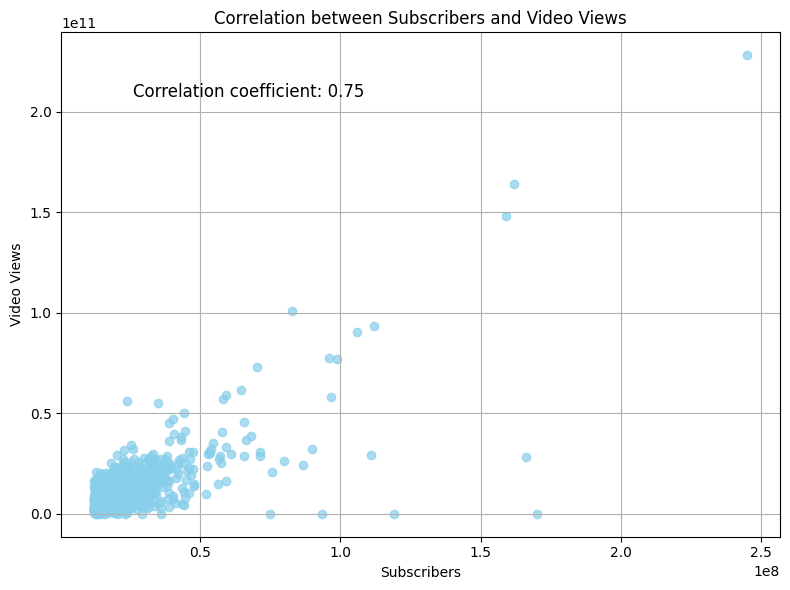

In [23]:
correlation = data['subscribers'].corr(data['video views'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['subscribers'], data['video views'], color='skyblue', alpha=0.7)
plt.title('Correlation between Subscribers and Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.grid(True)
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.tight_layout()

# Show the scatter plot
plt.show()

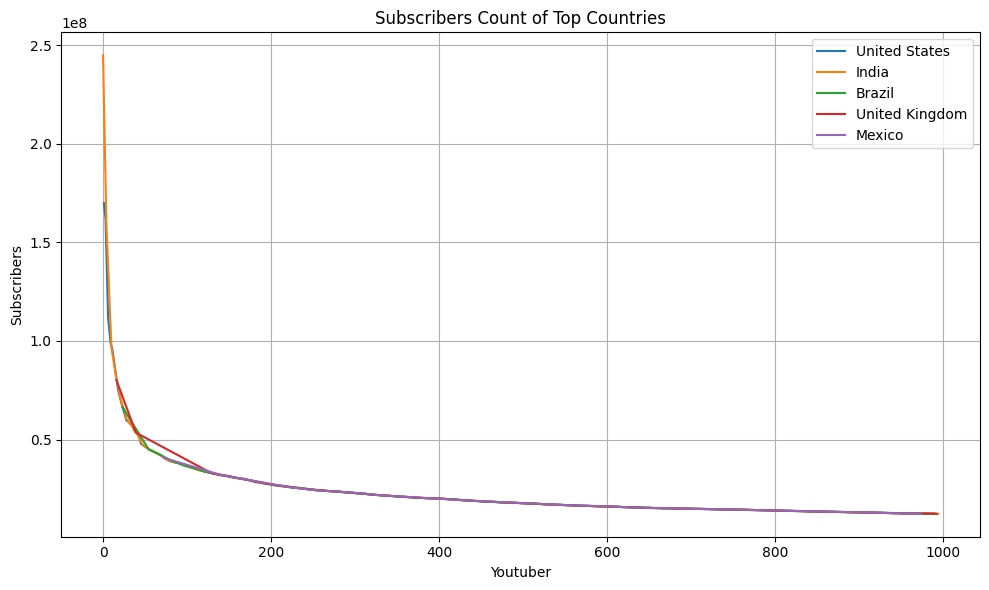

In [27]:
top_countries = data['Country'].value_counts().nlargest(5)  # Select top 5 countries
top_countries_data = data[data['Country'].isin(top_countries.index)]  # Filter data for top countries

# Group data by country and calculate total subscribers
country_subscribers = top_countries_data.groupby(['Country']).sum()['subscribers']

# Create line plot
plt.figure(figsize=(10, 6))
for country in top_countries.index:
    plt.plot(top_countries_data[top_countries_data['Country'] == country]['subscribers'], label=country)

plt.title('Subscribers Count of Top Countries')
plt.xlabel('Youtuber')
plt.ylabel('Subscribers')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the line plot
plt.show()



This line plot illustrates the subscribers count of YouTube channels based on their top countries. Each line represents the subscriber count trend for channels from a specific country over time. The plot provides insights into the distribution of subscribers across different countries.


C:\Users\vgowt\AppData\Local\Temp\ipykernel_10112\1986130049.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\vgowt\AppData\Local\Temp\ipykernel_10112\1986130049.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


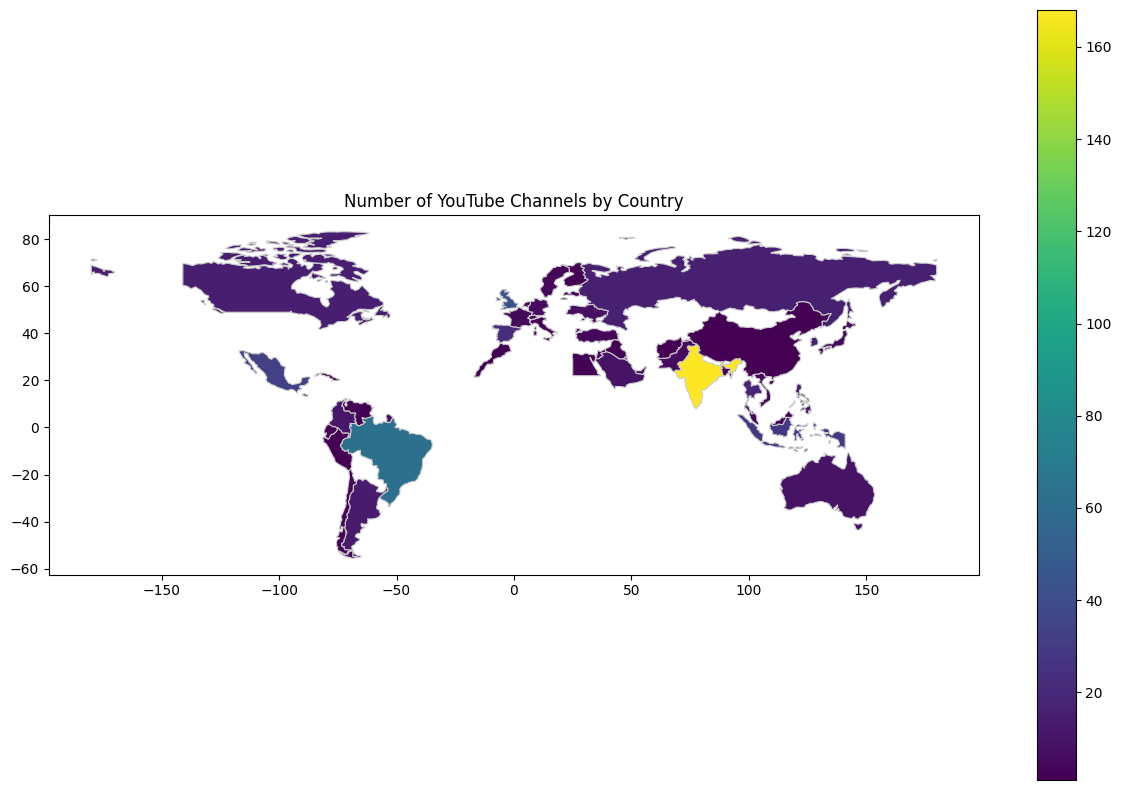

In [34]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group data by country and count the number of channels in each country
country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['name', 'count']

# Merge country counts with the GeoDataFrame
world = world.merge(country_counts, how='left', left_on='name', right_on='name')

# Define a custom colormap
norm = Normalize(vmin=world['count'].min(), vmax=world['count'].max())
cmap = cm.get_cmap('viridis')

# Plot the world map with color representing the number of channels in each country
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='count', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm)
ax.set_title('Number of YouTube Channels by Country')

plt.show()